Write a program (or programs) to integrate a set of an arbitrary number
of coupled differential equations using the Euler method, fourth order
Runge-Kutta, and Leapfrog. (Note: Leapfrog only applies to special
cases.) For Runge-Kutta, you may use a packaged routine such as
available in scipy or Numerical Recipes. If you do used a packaged
routine, be sure to use one with a fixed timestep and order so
that testing the convergence can be easily performed

In [22]:
# Euler method

def euler(deriv, state, step):
    """
    euler is a function that does one step of numerical integration given a state of values and a function
    to find how those values change with time. It returns a new set of values one step ahead of the given values.
    - deriv: function that evaluates the derivative of the given state
    - state: list of values to perfom euler integration on
    - step: interval over which to update the given state
    - return: updated state
    """
    state = np.array(state)
    
    return state + (step * deriv(state))
# Runge-Kutta

def runge_kutta(deriv, state, step):
    """
    runge_kutta is a function that does one step of numerical integration given a state of values and a function
    to find how those values change with time. It returns a new set of values one step ahead of the given values.
    - deriv: function that evaluates the derivative of the given state
    - state: list of values to perfom Runge-Kutta integration on
    - step: interval over which to update the given state
    - return: updated state
    """
    state = np.array(state)
    
    k1 = step * deriv(state)
    k2 = step * deriv(state + k1/2)
    k3 = step * deriv(state + k2/2)
    k4 = step * deriv(state + k3)
    
    return state + (k1/6 + k2/3 + k3/3 + k4/6)
# Leapfrog

def leapfrog(deriv, state, step):
    """
    leapfrog is a function that does one step of numerical integration given a state of values, a function
    to find the derivatives of the values, and step size. It return a new set of values one step ahead of
    the given values.
    - deriv: function that evaluates the derivative of the given state
    - state: list of values to perfom Runge-Kutta integration on
    - step: interval over which to update the given state
    - return: updated state
    """
    state = np.array(state)
    
    new_state[1] = state[1] + .5*step * deriv(state)[1]
    new_state[0] = state[0] + step * deriv(new_state)[0]
    new_state[1] = new_state[1] + .5*step * deriv(new_state)[1]
    
    return new_state

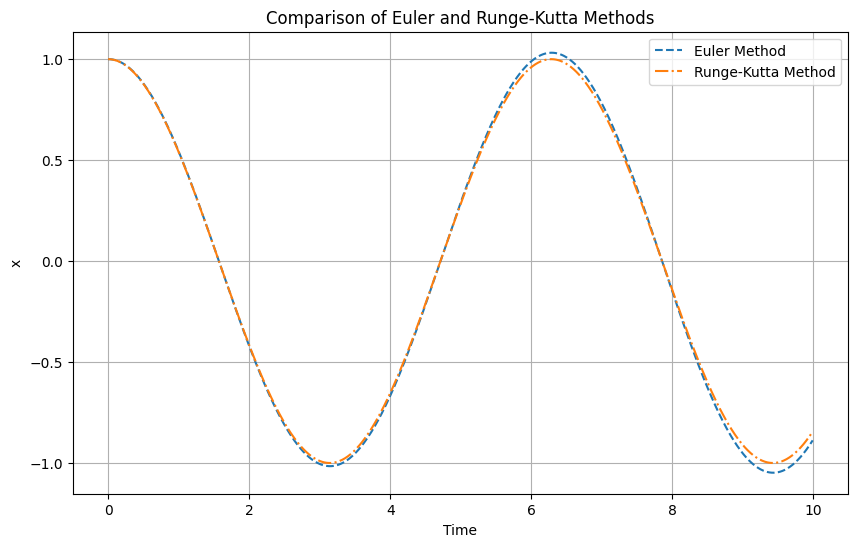

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the derivative for the system of ODEs in Problem 2
def deriv(y):
    """
    Computes the derivative of the system of ODEs for Problem 2.
    Args:
    y (numpy array): Array containing [x, x', y, y']

    Returns:
    numpy array: Derivatives [x', x'', y', y'']
    """
    return np.array([y[1], -y[0], y[3], -y[2]])

# Define the initial conditions and the interval for integration
initial_state = [1, 0, 0, 1]
t = [0, 10]  # Integration from t=0 to t=10
step_size = 0.01  # Initial step size

# Define the Euler method for solving ODEs
def euler_method(deriv, state, dt):
    """
    Euler method for one step of the numerical integration.
    Args:
    deriv (function): Function to compute the derivatives
    state (list): Current state of the system
    dt (float): Time step size

    Returns:
    list: Updated state of the system after one step
    """
    state = np.array(state)
    return state + dt * deriv(state)

# Define the Runge-Kutta method for solving ODEs
def runge_kutta_method(deriv, state, dt):
    """
    Runge-Kutta method for one step of the numerical integration.
    Args:
    deriv (function): Function to compute the derivatives
    state (list): Current state of the system
    dt (float): Time step size

    Returns:
    list: Updated state of the system after one step
    """
    state = np.array(state)
    k1 = dt * deriv(state)
    k2 = dt * deriv(state + 0.5 * k1)
    k3 = dt * deriv(state + 0.5 * k2)
    k4 = dt * deriv(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initialize arrays to store results
times = np.arange(t[0], t[1], step_size)
x_euler = []
x_rk = []

# Perform the integration using Euler and Runge-Kutta methods
state_euler = initial_state.copy()
state_rk = initial_state.copy()
for time in times:
    x_euler.append(state_euler[0])
    x_rk.append(state_rk[0])
    state_euler = euler_method(deriv, state_euler, step_size)
    state_rk = runge_kutta_method(deriv, state_rk, step_size)

# Plot the results for comparison
plt.figure(figsize=(10, 6))
plt.plot(times, x_euler, label='Euler Method', linestyle='--')
plt.plot(times, x_rk, label='Runge-Kutta Method', linestyle='-.')
plt.title('Comparison of Euler and Runge-Kutta Methods')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.grid(True)
plt.show()


$$\frac{dx^2}{dt} +x = 0$$

## $\Phi = - \frac{1}{\sqrt{1+x^2+y^2}}$



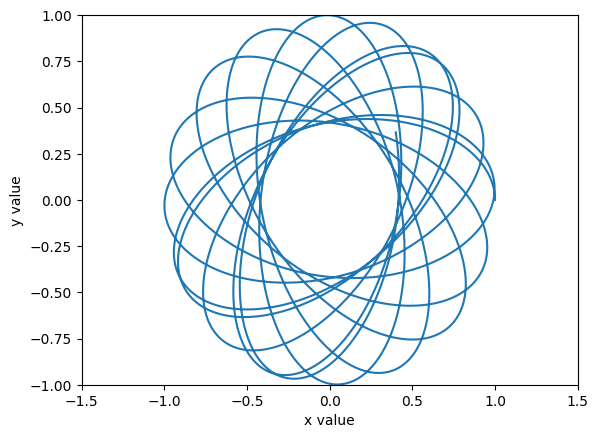

TypeError: 'float' object cannot be interpreted as an integer

In [14]:
def deriv2(y):
    """
    function that, given a list of differential equations, returns a list containing the derivative of each equation
    NOTE: this function only works for the differential equation defined in problem 3
    - y: list of differential equations
    - return: derivative of each equation in y
    """
    
    result = [y[2], y[3], -y[0]/(1 + y[0]**2 + y[1]**2)**(3/2), -y[1]/(1 + y[0]**2 + y[1]**2)**(3/2)]
    return np.array(result)

# set up conditions for problem 3
initial_state2 = [1, 0, 0, .3]
t2 = [0, 100]
step2 = .01
#3a

# reset state to initial state
state = initial_state2

# point to evaluate the state at
index = t2[0]

# lists to store results in
x_result = []
y_result = []

# find the numerical integration value over the integration range `t2` via Runge-Kutta
while index <= t2[1]:
    
    # update results
    x_result.append(state[0])
    y_result.append(state[1])
    
    # update state
    new_state = runge_kutta_method(deriv2, state, step2)
    state = new_state
    index += step2

# plotting
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)
plt.plot(x_result, y_result, label='Result')

plt.xlabel('x value')
plt.ylabel('y value')
plt.show()

 



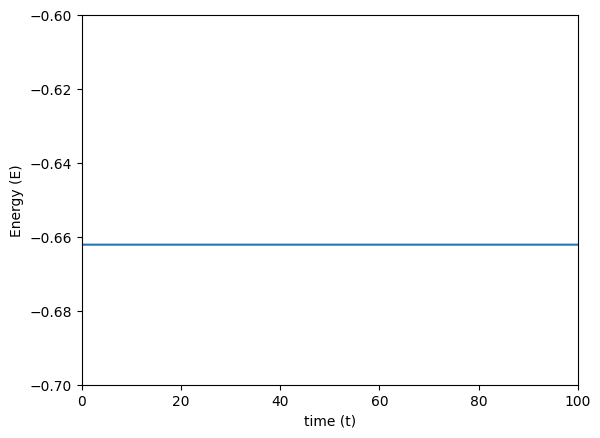

In [25]:
#3b

# reset state to initial state
state = initial_state2

# point to evaluate the state at
index = t2[0]

# lists to store results in
x = np.array([])
y = np.array([])
xp = np.array([]) # x'
yp = np.array([]) # y'

while index <= t2[1]:
    
    # update results
    x = np.append(x, [state[0]])
    y = np.append(y, [state[1]])
    xp = np.append(xp, [state[2]])
    yp = np.append(yp, [state[3]])
    
    # update state
    new_state = runge_kutta(deriv2, state, step2)
    state = new_state
    index += step2

def phi(x, y):
    """
    phi is a function defined in problem 3 above, dependent on x and y
    """
    phi = -1 / np.sqrt(1 + x**2 + y**2)
    return phi

# time to plot function over
t = np.linspace(t2[0], t2[1], int((t2[1]-t2[0])/step2))

# plotting
plt.xlim(0, 100)
plt.ylim(-.7, -.6)
plt.plot(t, .5*(xp**2 + yp**2) + phi(x, y))

plt.xlabel('time (t)')
plt.ylabel('Energy (E)')
plt.show()